# Homework 2

## Your Name Here (or your names here if you are pair programming)

 - Student Name:Odette Saenz
 - Student UT EID:oss286


 - Partner Name:Shruthi Garla
 - Partner UT EID:sg54464

## Practicing Pandas


In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Social Network Dataset

In this assignment we work with a social network dataset. 

You have 5 tables to work on. 

1. **person_knows_person**
This table represents the friendship between users. A person can have many friends. Persons have unique integer id number. 

2. **person_likes_post_file** 
This tables represents user likes. A person and a post is represented by IDs. 

3. **post_hasCreator_person**
A person creates many posts. Each post has a unique creator person id. 

4. **comment_replyOf_post**
This table represents comments on posts. Both post and comments have unique ids. 

5. **comment_hasCreator_person** 
A user can comment on posts. Each comment has a unique creator person id. 


In [2]:
url = "https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/main/datasets/social-media/"

person_knows_person_file = url + "person_knows_person.csv"
person_likes_post_file = url + "person_likes_post.csv"
post_hasCreator_person_file = url + "post_hasCreator_person.csv"
comment_replyOf_post_file = url + "comment_replyOf_post.csv"
comment_hasCreator_person_file = url + "comment_hasCreator_person.csv"

person_knows_person = pd.read_csv(person_knows_person_file,  sep='|')
person_likes_post = pd.read_csv(person_likes_post_file,  sep='|')
post_hasCreator_person = pd.read_csv(post_hasCreator_person_file,  sep='|')
comment_replyOf_post = pd.read_csv(comment_replyOf_post_file, sep='|')
comment_hasCreator_person = pd.read_csv(comment_hasCreator_person_file,  sep='|')

print(person_knows_person.head(5))
print("-------------------------")

print(person_likes_post.head(5))
print("-------------------------")

print(post_hasCreator_person.head(5))
print("-------------------------")

print(comment_replyOf_post.head(5))
print("-------------------------")

print(comment_hasCreator_person.head(5))
print("-------------------------")

   Person.id  Person.id.1
0         38          956
1         38          962
2         38          941
3         38           74
4         38           36
-------------------------
   Person.id  Post.id          creationDate
0         74        0  2012-10-15T05:13:41Z
1         36        0  2012-10-18T10:51:39Z
2        417       10  2012-11-18T11:14:47Z
3        415       10  2012-11-20T06:30:22Z
4        109       10  2012-11-19T11:03:52Z
-------------------------
   Post.id  Person.id
0        0         38
1       10         38
2       20         38
3       30         38
4       40         38
-------------------------
   Comment.id  Post.id
0           0        0
1          10        0
2          30        0
3          70        0
4         100       10
-------------------------
   Comment.id  Person.id
0           0         74
1          10        832
2          20        913
3          30        457
4          40        956
-------------------------


# Question - 1. Who are the top-10 users who have the highest number of friends? (4 points)
Count up the number of friends of each user and provide the top-10 of this number of friend count list. Print out their user IDs. 

In [4]:
# Counts the number of friends for each user
friend_counts = pd.concat([
    person_knows_person['Person.id'], 
    person_knows_person['Person.id.1']
]).value_counts()

# Gets the top 10 users
top_10_users = friend_counts.head(10)

# Prints their user IDs
print("Top 10 users with the highest number of friends:")
print(top_10_users)

Top 10 users with the highest number of friends:
336    198
959    198
40     198
430    196
811    196
296    196
938    196
804    194
165    194
323    192
Name: count, dtype: int64


# Question - 2. Who wrote the most liked post?  (4 points)
Count up the number of likes for each post and find out who wrote that post. 
Print out the user id. If there are multiple maximum print them all. 

In [5]:
# Counts the likes for each post
post_like_counts = person_likes_post['Post.id'].value_counts()

# Finds the post(s) with the most likes
max_likes = post_like_counts.max()
most_liked_posts = post_like_counts[post_like_counts == max_likes].index

# Finds the creator(s) of these posts
most_liked_creators = post_hasCreator_person[post_hasCreator_person['Post.id'].isin(most_liked_posts)]

# Prints the user IDs
print("Users who wrote the most liked post(s):")
print(most_liked_creators['Person.id'].unique())

Users who wrote the most liked post(s):
[ 38 941 347 495 884 336 405 135 587 863  43 875 861 422 514 746 728 548
 825 402 109 557  72 627 790 463 838  65 357  52 427 193 629 232 186 197
 585 429  28 732 318 635 393 654 105 659 189 643 668 556 383 532 326 970
 717 900 910 239 524 396 224 795 262  91 711 348 153 663 996 473 415 842
 762  86 731 919 685 505 353 965 712 945 564 122 959 997  36 510 278 675
  13 275 568 221  73 669 408 483 844 517 544 118  48 370 976 609 156 102
 333 770 569 630 451 542 911 430  83 979 896 297 394 182 828 882 878 529
 819   3 149  78 319 180 683 938 951   5 434 572 157 886 785 613 229 980
 778   4 476 491  11 715 942 280 835 986 661 834 545 780 674 858 876 658
 464 929 960 325 618 888 693 921 694 983 696 179 406 225  55 958 167 991
 767 250 480 899  21 943 772 166 987 786 565 366  99  71 814 446 745 699
 998 892 648  66 531 632 738  53  22 550 571 716 131 395 647 420 168 101
 344  31 908 640 651 682 973  64 266 417 426 274 570 191 680  41 155 859
 649 913 70

# Question - 3. Who wrote the most influential post? The most influential post is the most discussed and most liked post. (4 points)

**Tip:** First, count up the number of comments and likes that each post has. Then find out which post it is, and finally find out who wrote that. 
Print out one user id. 
If there is a tie, print out the ***one***  at the tope of the list.


In [6]:
# Counts the number of likes per post
likes_per_post = person_likes_post['Post.id'].value_counts()

# Counts the number of comments per post
comments_per_post = comment_replyOf_post['Post.id'].value_counts()

# Merges the two counts into a single DataFrame
post_influence = pd.DataFrame({'Likes': likes_per_post, 'Comments': comments_per_post}).fillna(0)

# Calculates total influence (likes + comments)
post_influence['Total_Influence'] = post_influence['Likes'] + post_influence['Comments']

# Finds the post with the highest influence
most_influential_post = post_influence['Total_Influence'].idxmax()

# Finds the creator of that post
creator = post_hasCreator_person[post_hasCreator_person['Post.id'] == most_influential_post]['Person.id'].iloc[0]

# Prints the result
print("User who wrote the most influential post:", creator)

User who wrote the most influential post: 325


# Question - 4. Create two histograms for the distributions of the number of likes and comments that users have created. (4 points)
Describe the shape of these data two data distributions. 

**Tip:** First perpare two lists of number of likes and number of comments that users have done. You need to count up how many likes and how many comments each unique user id has. 

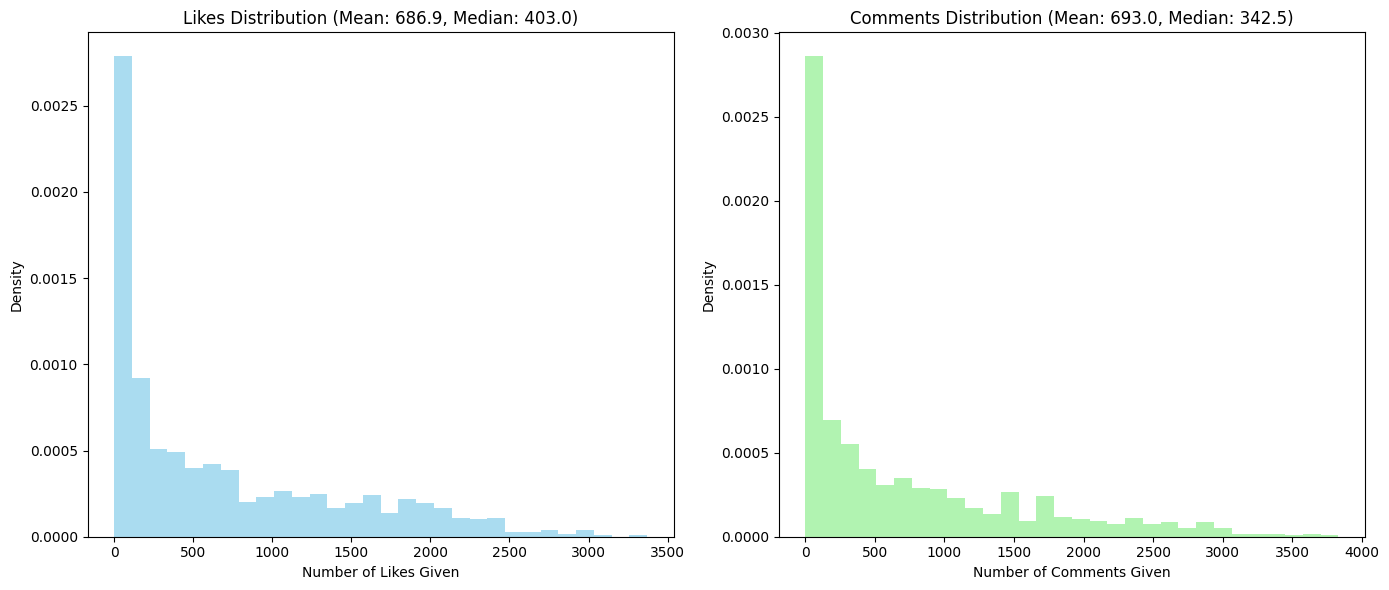

In [8]:
# Counts likes per user
likes_per_user = person_likes_post['Person.id'].value_counts()

# Counts comments per user
comments_per_user = comment_hasCreator_person['Person.id'].value_counts()

# Calculate the mean and median (summary statistics) for likes
likes_mean, likes_median = likes_per_user.mean(), likes_per_user.median()

# Calculates the mean and median for comments
comments_mean, comments_median = comments_per_user.mean(), comments_per_user.median()

# Creates subplots for displaying two histograms side by side
# figsize(14, 6) creates a larger plot to fit both histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Likes
# This creates a histogram for likes with 30 bins and normalizes the values to show the density (total area under the histogram equals 1)
axes[0].hist(likes_per_user, bins=30, color='skyblue', alpha=0.7, density=True)
# Setting the title of the histogram, including the mean and median values for context
axes[0].set_title(f'Likes Distribution (Mean: {likes_mean:.1f}, Median: {likes_median})')
axes[0].set_xlabel('Number of Likes Given')
axes[0].set_ylabel('Density')

# Histogram for Comments
# This creates a histogram for comments with 30 bins, normalizing the values to show the density
axes[1].hist(comments_per_user, bins=30, color='lightgreen', alpha=0.7, density=True)
# Setting the title of the histogram, including the mean and median values for context
axes[1].set_title(f'Comments Distribution (Mean: {comments_mean:.1f}, Median: {comments_median})')
# Adding x-axis label to describe what the histogram represents
axes[1].set_xlabel('Number of Comments Given')
# Adding y-axis label to describe what the histogram represents
axes[1].set_ylabel('Density')

# Adjust layout to make sure the histograms fit within the figure and do not overlap
plt.tight_layout()

# Display the histograms
plt.show()

## Analysis of Distributions

### Likes Distribution:
The histogram for likes per user shows a **left-skewed distribution**, where the majority of users have given a small number of likes. The distribution has a higher frequency of lower values on the left, and the number of likes exponentially decreases as we move to the right along the x-axis. This suggests that most users give only a few likes, while a small proportion of users contribute significantly more likes.

### Comments Distribution:
Similarly, the histogram for comments per user is also **left-skewed**. It exhibits a higher concentration of users who have given a relatively small number of comments, with the frequency of higher values decreasing exponentially along the x-axis. The pattern is consistent with the likes distribution, where the majority of users are less active in commenting, and only a small group of users have provided a larger number of comments.

# Question - 5. What is the Pearson correlation coefficient between the number of comments and the number of likes that users do on the social network? (4 points)

Print out one number. 



**Tip:** You can calculate correlation coefficient using the following formula: 
Assume that x and y are two arrays of data, in this case number of likes and comments of each user. n is the number of users. 

**Bonus Tip:** Consider that some users might have liked posts, but not liked any comments, or vice versa.

You can use whichever technique you would like for the question, as long as it has been discussed in lecture.

 


\begin{align*}
r= {{ n(\sum x y ) - (\sum x ) (\sum y)    } \over { \sqrt{ [ n \sum x^2  -
(\sum x)^2 ] [ n\sum y^2 - (\sum y )^2 ] } } }
\end{align*}











In [9]:
# Counts likes per user
likes_per_user = person_likes_post['Person.id'].value_counts()

# Counts comments per user
comments_per_user = comment_hasCreator_person['Person.id'].value_counts()

# Creates a DataFrame to merge both counts
user_activity = pd.DataFrame({'Likes': likes_per_user, 'Comments': comments_per_user}).fillna(0)

# Extracts x (likes) and y (comments)
x = user_activity['Likes'].values
y = user_activity['Comments'].values

# Computes Pearson correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

# Prints the result, rounded to 4 decimal places for clarity
# Pearson correlation coefficient ranges from -1 to 1, where:
# 1 indicates a perfect positive linear relationship
# -1 indicates a perfect negative linear relationship
# 0 indicates no linear relationship
print(round(correlation_coefficient, 4))

0.9244


In [10]:
print("In this case, a value of 0.9244 shows that there is a significant tendency for users who engage more with likes to also engage more with comments.")
print("This can be useful in understanding user behavior and can inform strategies for user engagement on the platform.")

In this case, a value of 0.9244 shows that there is a significant tendency for users who engage more with likes to also engage more with comments.
This can be useful in understanding user behavior and can inform strategies for user engagement on the platform.
